# Opioid Prescription Trend Analysis

The opioid epidemic in the United States claims the lives of over 130 people per day. The CDC categorizes three distinct waves that are responsible for these deaths: prescription opioid overdose deaths, heroin overdose deaths, and synthetic opioid related deaths. 

In this project, I aim to make sense of geographic and temporal trends in pharmaceutical dispension rates of **prescription opioids**. My motivation for completing this project is a personal interest in healthcare and understanding real world trends. 

It is widely known that synthetic opioid-related deaths continue to rise, due in large part to the increase in illicitly made fentanyl. This project aims to make sense of the present state of prescription opioids in America-- which have received less attention and news coverage in recent years than other synthetic and illegally distributed opioids like fentanyl. Specifically, I want to understand potential differences in prescription rates among rural and urban communities, especially after previously reading about the dramatic rise in opioid-related deaths in the rural midwest. I also want to understand if prescription rates may have changed over the course of the COVID-19 pandemic, as the landscape of delivery of healthcare changed dramatically over a couple of years.

I used the 2019-2022 County Opioid Dispensing Rates dataset from the CDC: https://www.cdc.gov/overdose-prevention/data-research/facts-stats/opioid-dispensing-rate-maps.html. To classify counties as Urban or Rural, I also used the Rural-Urban Continuum Codes dataset from the USDA, Economic Research Service, updated January 2024: https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/.

This notebook includes the following components:
1) Data Cleaning and Visualization
2) Hypothesis Test 1: (HA) There is a significant difference between prescription opioid dispension rate in rural and urban counties in the United States
3) Hypothesis Test 2: (HA) The mean Opioid Dispension Rate across the United States changes significantly over the course of 2019, 2020, 2021, and 2022.
4) Analysis and Limitations

### 1) Data Cleaning and Visualization

This dataset contains 12340 rows and 8 columns. The most relevant columns will be 'YEAR', 'opioid_dispensing_rate', and 'STATE_COUNTY_FIP_U' - Federal Information Processing (FIP) code being a unique identifier for each County in the United States.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('County_Opioid_Dispensing_Rates.csv')
df.head()

,FullGeoName,YEAR,STATE_NAME,STATE_ABBREV,COUNTY_NAME,STATE_COUNTY_FIP_U,opioid_dispensing_rate,Opioid Dispensing Rate (per 100 persons)
0,"AL, Autauga",2019,Alabama,AL,Autauga County,1001,102.8,>51.0
1,"AL, Baldwin",2019,Alabama,AL,Baldwin County,1003,67.9,>51.0
2,"AL, Barbour",2019,Alabama,AL,Barbour County,1005,27.6,18.6 - 32.2
3,"AL, Bibb",2019,Alabama,AL,Bibb County,1007,21.0,18.6 - 32.2
4,"AL, Blount",2019,Alabama,AL,Blount County,1009,23.8,18.6 - 32.2


In [3]:
df.shape

(12340, 8)

In [4]:
df.isnull().sum()

FullGeoName                                 0
YEAR                                        0
STATE_NAME                                  0
STATE_ABBREV                                0
COUNTY_NAME                                 0
STATE_COUNTY_FIP_U                          0
opioid_dispensing_rate                      9
Opioid Dispensing Rate (per 100 persons)    9
dtype: int64

In [5]:
#can drop all null values due to the low number of null values in the rate columns
df = df.dropna(subset = ['opioid_dispensing_rate', 'Opioid Dispensing Rate (per 100 persons)'])


In [6]:
#creating rucc codes dataframe that categorizes counties by urban/rural
rucc_codes = pd.read_csv('Rural-urban Continuum Code 2023-Table 1.csv')
rucc_codes.head()

,FIPS,State,County_Name,Population_2020,RUCC_2023,Description,Unnamed: 6
0,1001,AL,Autauga County,"58,805",2.0,"Metro - Counties in metro areas of 250,000 to ...",NaN
1,1003,AL,Baldwin County,"231,767",3.0,Metro - Counties in metro areas of fewer than ...,NaN
2,1005,AL,Barbour County,"25,223",6.0,"Nonmetro - Urban population of 5,000 to 20,000...",NaN
3,1007,AL,Bibb County,"22,293",1.0,Metro - Counties in metro areas of 1 million p...,NaN
4,1009,AL,Blount County,"59,134",1.0,Metro - Counties in metro areas of 1 million p...,NaN


In [7]:
#creating column for urban/rural by metro/nonmetropolitan distinctions by rucc codes
rucc_codes['urban_rural'] = rucc_codes['RUCC_2023'].apply(lambda x: 'Urban' if x in [1, 2, 3] else 'Rural')
#dropping irrelevant/redundant columns
rucc_codes = rucc_codes.drop(columns=['State', 'County_Name', 'Description', 'Unnamed: 6'])
rucc_codes.head()


,FIPS,Population_2020,RUCC_2023,urban_rural
0,1001,"58,805",2.0,Urban
1,1003,"231,767",3.0,Urban
2,1005,"25,223",6.0,Rural
3,1007,"22,293",1.0,Urban
4,1009,"59,134",1.0,Urban


In [8]:
merged_df = pd.merge(df, rucc_codes, left_on='STATE_COUNTY_FIP_U', right_on='FIPS', how='left')
merged_df.head()

,FullGeoName,YEAR,STATE_NAME,STATE_ABBREV,COUNTY_NAME,STATE_COUNTY_FIP_U,opioid_dispensing_rate,Opioid Dispensing Rate (per 100 persons),FIPS,Population_2020,RUCC_2023,urban_rural
0,"AL, Autauga",2019,Alabama,AL,Autauga County,1001,102.8,>51.0,1001.0,"58,805",2.0,Urban
1,"AL, Baldwin",2019,Alabama,AL,Baldwin County,1003,67.9,>51.0,1003.0,"231,767",3.0,Urban
2,"AL, Barbour",2019,Alabama,AL,Barbour County,1005,27.6,18.6 - 32.2,1005.0,"25,223",6.0,Rural
3,"AL, Bibb",2019,Alabama,AL,Bibb County,1007,21.0,18.6 - 32.2,1007.0,"22,293",1.0,Urban
4,"AL, Blount",2019,Alabama,AL,Blount County,1009,23.8,18.6 - 32.2,1009.0,"59,134",1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
12326,"WY, Sweetwater",2022,Wyoming,WY,Sweetwater County,56037,74.4,>51.0,56037.0,"42,272",5.0,Rural
12327,"WY, Teton",2022,Wyoming,WY,Teton County,56039,46.6,32.3 - 51.0,56039.0,"23,331",7.0,Rural
12328,"WY, Uinta",2022,Wyoming,WY,Uinta County,56041,61.6,>51.0,56041.0,"20,450",7.0,Rural
12329,"WY, Washakie",2022,Wyoming,WY,Washakie County,56043,97.9,>51.0,56043.0,"7,685",9.0,Rural


Text(0.5, 1.0, 'Opioid Dispension Rate by State')

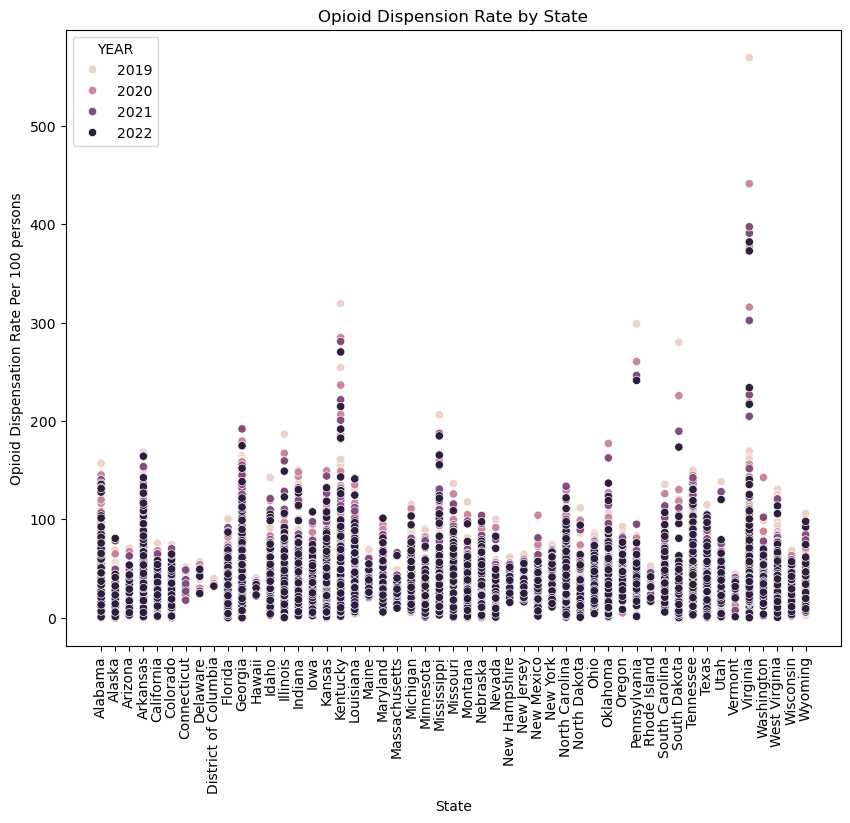

In [9]:
#visualization of opioid dispension rate by state
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=merged_df, x="STATE_NAME", y="opioid_dispensing_rate", hue="YEAR", alpha=1)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Opioid Dispensation Rate Per 100 persons")
plt.title("Opioid Dispension Rate by State")


Text(0.5, 1.0, 'Opioid Dispension Rate by Geography')

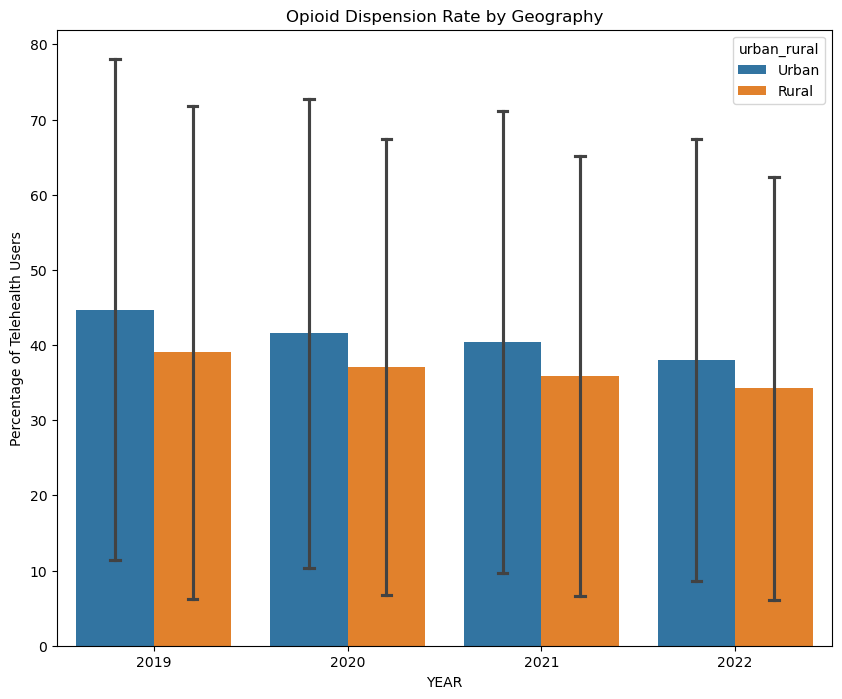

In [10]:
# Visualization of Rural Vs Urban Telehealth users over the Years
plt.figure(figsize=(10,8))
ax = sns.barplot(data=merged_df, x="YEAR", y="opioid_dispensing_rate", hue="urban_rural", errorbar="sd", capsize=0.1)
plt.ylabel("Percentage of Telehealth Users")
plt.title("Opioid Dispension Rate by Geography")

It appears that urban counties, on average, have a higher prescription opioid dispension rate per 100 persons. In hypothesis test 1 I will determine whether that difference is statistically different. 


### 2) Hypothesis Test 1: (HA) There is a significant difference between prescription opioid dispension rate in rural and urban counties in the United States.

Null hypothesis: There is no significant difference in opioid dispension rate in rural and urban communities in the U.S.

I will perform a two-sample t-test. I will assume that the sample groups (rural/urban) are independent and the data follows a normal distribution.

I use a significance value of 0.05

In [11]:
import scipy.stats as stats

In [12]:
# Creating two datasets for urban and rural respectively
rural = merged_df[merged_df['urban_rural'] == "Rural"]
urban = merged_df[merged_df['urban_rural'] == "Urban"]


In [13]:
rural = rural[['STATE_NAME', 'opioid_dispensing_rate']]
urban = urban[['STATE_NAME', 'opioid_dispensing_rate']]

In [14]:
# Grouping by State and using the mean telehealth usage over the years
rural = rural.groupby("STATE_NAME").mean()
urban = urban.groupby("STATE_NAME").mean()


In [15]:
stats.ttest_ind(a=rural,b=urban)


Ttest_indResult(statistic=array([-1.99113393]), pvalue=array([0.04933846]))

Given that the p-value 0.04934 is smaller than the alpha of 0.05, I **reject** the null hypothesis that there isn't a significant difference between opioid dispension rate among rural and urban counties. However, it's worth noting that the p-value is not smaller by a large amount, and the determination of statistical significance is thus highly dependent on the choice of alpha. 

### 3) Hypothesis Test 2: (HA) The mean Opioid Dispension Rate across the United States changes significantly over the course of 2019, 2020, 2021, and 2022.

Null hypothesis: There is no significant change in opioid dispension rate over the years 2019-2022. 

I will perform one-way repeated measures ANOVA. I will assume that the sample groups (rural/urban) are independent and the data follows a normal distribution.

I use a significance value of 0.05.

In [19]:
import pingouin as pg

In [20]:
#first, have to prepare the dataset for this test
#pivoting year column to get rate for each year in separate comns
county_pivot_df = merged_df.pivot(index='STATE_COUNTY_FIP_U', columns='YEAR', values='opioid_dispensing_rate').reset_index()

county_pivot_df.columns.name = None  # remove the columns grouping name
county_pivot_df = county_pivot_df.rename(columns={2019: 'dispensing_rate_2019',
                                                  2020: 'dispensing_rate_2020',
                                                  2021: 'dispensing_rate_2021',
                                                  2022: 'dispensing_rate_2022'})

county_pivot_df.head()

,STATE_COUNTY_FIP_U,dispensing_rate_2019,dispensing_rate_2020,dispensing_rate_2021,dispensing_rate_2022
0,1001,102.8,95.2,91.3,78.1
1,1003,67.9,64.2,61.7,61.7
2,1005,27.6,22.5,15.4,9.4
3,1007,21.0,24.7,29.1,33.6
4,1009,23.8,22.3,22.9,19.0


In [21]:
#checking if there's any missing data after pivoting 
print(county_pivot_df.isna().sum())

STATE_COUNTY_FIP_U       0
dispensing_rate_2019     7
dispensing_rate_2020    21
dispensing_rate_2021    20
dispensing_rate_2022    29
dtype: int64


In [22]:
#dropping missing values due to insignificant amount
county_pivot_df.dropna(inplace=True)


In [23]:
#reshaping dataset to a long format for ANOVA
data_long = pd.melt(county_pivot_df, id_vars=['STATE_COUNTY_FIP_U'], 
                    value_vars=['dispensing_rate_2019', 'dispensing_rate_2020', 'dispensing_rate_2021', 'dispensing_rate_2022'],
                    var_name='year', value_name='opioid_dispensing_rate')



In [24]:
data_long.head()

,STATE_COUNTY_FIP_U,year,opioid_dispensing_rate
0,1001,dispensing_rate_2019,102.8
1,1003,dispensing_rate_2019,67.9
2,1005,dispensing_rate_2019,27.6
3,1007,dispensing_rate_2019,21.0
4,1009,dispensing_rate_2019,23.8
...,...,...,...
12235,56037,dispensing_rate_2022,74.4
12236,56039,dispensing_rate_2022,46.6
12237,56041,dispensing_rate_2022,61.6
12238,56043,dispensing_rate_2022,97.9


In [25]:
anova_results = pg.rm_anova(data=data_long, dv='opioid_dispensing_rate', 
                            within='year', subject='STATE_COUNTY_FIP_U', detailed=True)

# Display the results
anova_results

  Source             SS    DF            MS           F          p-unc  \
0   year   52228.465127     3  17409.488376  451.554694  1.156495e-273   
1  Error  353815.112373  9177     38.554551         NaN            NaN   

       p-GG-corr       ng2       eps sphericity   W-spher  p-spher  
0  2.136779e-160  0.004534  0.580607      False  0.295348      0.0  
1            NaN       NaN       NaN        NaN       NaN      NaN  


In [26]:
anova_results

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,year,52228.465127,3,17409.488376,451.554694,1.156495e-273,2.136779e-160,0.004534,0.580607,False,0.295348,0.0
1,Error,353815.112373,9177,38.554551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While the p-value 1.1565e-273 is significantly smaller than the alpha of 0.05, based on the fact that Mauchly's W for sphericity test (W-spher) is not close to 1 and the p-spher of 0 shows that Mauchly's test is statistically significant, the assumption of sphericity (which is needed for repeated measures ANOVA) is violated. Thus, we need to apply the Greenhouse-Geiser Correction to the p-value. The GG corrected p-value p-GG-corr is 2.136779e-160, which is still smaller than the alpha of 0.05, so we can reject the null hypothesis that there is no significant difference in opioid dispension rate across the years 2019-2022.

I will now perform post-hoc tests to determine differences between each year combination.

In [31]:
post_hoc_results = pg.pairwise_tests(dv='opioid_dispensing_rate', within='year', subject='STATE_COUNTY_FIP_U', data=data_long, padjust='bonferroni')
post_hoc_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,year,dispensing_rate_2019,dispensing_rate_2020,True,True,20.419597,3059.0,two-sided,5.476867e-87,3.286120e-86,bonferroni,1.296e+83,0.081700
1,year,dispensing_rate_2019,dispensing_rate_2021,True,True,21.208571,3059.0,two-sided,3.001070e-93,1.800642e-92,bonferroni,2.262e+89,0.120458
2,year,dispensing_rate_2019,dispensing_rate_2022,True,True,25.771036,3059.0,two-sided,1.046158e-132,6.276950e-132,bonferroni,5.116e+128,0.184314
3,year,dispensing_rate_2020,dispensing_rate_2021,True,True,10.849082,3059.0,two-sided,6.191051e-27,3.714631e-26,bonferroni,2.316e+23,0.039229
4,year,dispensing_rate_2020,dispensing_rate_2022,True,True,18.085347,3059.0,two-sided,1.539167e-69,9.235005e-69,bonferroni,5.315e+65,0.104130
5,year,dispensing_rate_2021,dispensing_rate_2022,True,True,16.870116,3059.0,two-sided,3.985125e-61,2.391075e-60,bonferroni,2.223e+57,0.065016


The post-hoc paired t-tests reveal significant differences between all year combinations, as p < 0.05 for all pairs. Notably:

1. The largest difference is between 2019 and 2022 (t = 25.77, p ≈ 1.05e-132), showing a substantial decrease in opioid dispensing rates over this period
2. The smallest difference is between 2020 and 2021 (t = 10.85, p ≈ 6.19e-27), but is still statistically significant.
3. Each subsequent year shows a significant decrease from the previous year, demonstrating a consistent downward trend in opioid prescription rates from 2019 to 2022

Even after considering multiple comparisons (Bonferroni-adjusted p-value = 0.05/6 ≈ 0.0083 for 6 paired tests), all differences are significant as all uncorrected p-values are far smaller than the adjusted alpha value.


### 4) Analysis and Limitations

Key Findings:
1. Geographic Differences: While I found a difference between urban and rural opioid dispensing rates (p = 0.049), the p-value suggests this difference is marginally statistically significant. Urban areas showed slightly higher dispensing rates overall.

2. Temporal Trends: There is strong evidence of decreasing opioid prescription rates from 2019 to 2022, with each year showing significantly lower rates than the previous year.

This analysis is important because it reveals that despite decreasing opioid prescription rates over the years, opioid-related deaths have increased. It suggests that it is possible that messaging regarding overprescribing opioids has made a significant difference on doctors and surgeons and how often they prescribe. And yet, despite this, deaths still increase likely due to what we all seem to know-- illegally distributed synthetic opioids. 

Some Limitations that I came across with regards to data variability and outliers:
   - The large error bars in initial visualizations indicated substantial within-group variation
   - It became clear that this high variability likely contributed to the violation of sphericity in the repeated measures ANOVA, as ANOVA generally does not perform well with a lot of outliers.
